# Day 2 - Gradient Descent (Part 1)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from typing import Dict, Tuple, Callable

In [2]:
plt.rcParams["figure.figsize"] = (12, 6) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size

Import Data

In [3]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Let's have a short look at the data first:

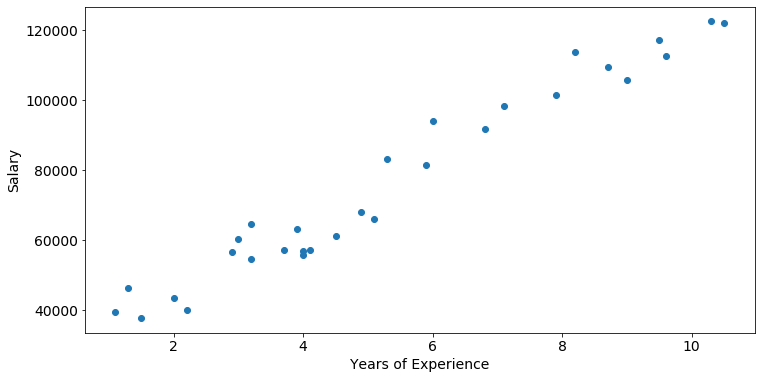

In [4]:
plt.plot(data['YearsExperience'], data['Salary'], 'o')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
None

## Linear regression - General concept
A linear model assumes that the relationship between the dependent variable y and the our features x is linear and thus takes the form:

$y_i = \beta_{0} + \beta_{1} x_{i1} + \cdots + \beta_{p} x_{ip} + \varepsilon_i,
 \qquad i = 1, \ldots, n$


### Matrix notation

We can simplify the notation by adding a first column with a constant to $X$. In particular,  ${\displaystyle \mathbf {x} _{i0}=1}$ for ${\displaystyle i=1,\ldots ,n}$. The corresponding element $\beta_0$ is called the intercept.

Then the previous formula can be written more compact in matrix notation as:
 
$\mathbf{y} = X\boldsymbol\beta + \boldsymbol\varepsilon$

where

${\displaystyle \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad }
{\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}$


${\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad}
{{\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.}$

- $\mathbf {y}$
 is a vector of observed values 
${\displaystyle y_{i}\ (i=1,\ldots ,n)}$
 of the variable called the regressand, endogenous variable or dependent variable. In our case this is the salary.
 
- ${\boldsymbol\displaystyle X}$ is a matrix of row-vectors ${\displaystyle \mathbf {x} _{i}}$ called independent variable and contains the features of our data points. In our case this is the years of experience.

- $\boldsymbol\varepsilon$ is called error term, disturbance term, or sometimes noise. This variable captures all other factors which influence the dependent variable y other than the regressors x.

- $\boldsymbol\beta$ is a vector of the regression coefficients. 
 

 

 
 
 
 
 https://en.wikipedia.org/wiki/Linear_regression

## Extract dependent and independent variables
We create a numpy vector of our independent variable and a numpy array of our independent variable.

Add a column full of ones to $X$ so that ${x} _{i0}=1$  for $i=1,\ldots ,n$. The corresponding element $\beta_0$ is called the intercept or bias.

In [5]:
y = data.iloc[:,1].values.reshape(-1, 1)
y = y.reshape(-1, 1)

X = data.iloc[:,:-1].values
X_b = np.hstack((np.ones((X.shape[0],1)), X))
X_b[:10,:]

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.2],
       [1. , 2.9],
       [1. , 3. ],
       [1. , 3.2],
       [1. , 3.2],
       [1. , 3.7]])

What you mainly need is the formula for calculating the cost function $J(\boldsymbol\theta)$ and its derivative:

$J(\boldsymbol\beta) = \frac{1}{n} (\hat  {\mathbf y} − \mathbf{y})^T (\hat  {\mathbf y} − \mathbf{y}) 
= \frac{1}{n} (X\boldsymbol \beta − \mathbf{y})^T (X\boldsymbol \beta − \mathbf{y})$

$\nabla_\beta J(\boldsymbol\beta) = \frac{2}{n} X^T (X\boldsymbol \beta − \mathbf{y}) = \frac{2}{n} X^T ( \hat  {\mathbf y} − \mathbf{y})$

For a detailed derivation of the gradient in matrix notation check this lecture notes from Stanford:

http://cs229.stanford.edu/notes/cs229-notes1.pdf (chapter 2.2, page 11, they use theta instead of beta)


In [24]:
def predict(X_b: np.ndarray, beta: np.ndarray) -> np.ndarray:
    """
    :param X_b: feature matrix including column of ones for bias
    :return: result of the linear regression
    """
    
    
    return y_hat


#  we actually don't need the cost function itself for gradient descent
#  but it is nice to have and certainly a good exercise for you ;)
def calc_cost(X_b: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    """
    :param X_b: feature matrix including column of ones for bias
    :param y: labels
    :param beta: regression coefficients 
    :return: return cost
    """
    
    
    return cost


# what we need is the gradient, which consists of the partial derivatives of the cost function
def calc_gradient(
    X_b: np.ndarray, y: np.ndarray, beta: np.ndarray, alpha: float = None
) -> np.ndarray:
    """
    :param X_b: feature matrix including column of ones for bias
    :param y: labels
    :param beta: regression coefficients 
    :param alpha: for Lasso regrisson (you might need it for exercise 2 - bonus)
    :return: gradient
    """
    
    
    return grad


def update_beta(beta: np.ndarray, gradient: np.ndarray, learning_rate: float = 0.1):
    """
    :param beta: regression coefficient vector
    :param gradient: gradient vector
    :param lr: learning rate for updating beta
    :return: updated beta vector
    """
    
    
    return beta_new


def calc_rmse(y: np.ndarray, y_hat: np.ndarray):
    """
    :param y: vector of observed values
    :param y_hat: vector of estimated (predicted) values
    :return: root mean squared error (RMSE)
    """
    
    
    return rmse

Let's play a bit with beta to see what effect it has on our linear model:

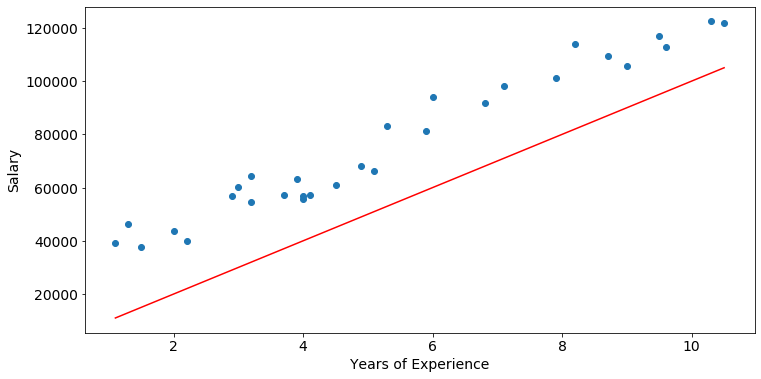

In [7]:
#  try different values
beta = [0, 10000]

plt.plot(X_b[:,1], y, 'o')
plt.plot(X_b[:,1], predict(X_b, beta), c='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
None

# Gradient Decent

This function takes care of running multiple iterations, plotting and collecting the results. Understand what it is exactly doing.

In [8]:
def run_gradient_descent(
    gradient_descent_func: Callable,
    X_b: np.ndarray,
    y: np.ndarray,
    learning_rate: np.ndarray = 0.01,
    epochs: float = 100,
    beta: np.ndarray = None,
    verbose: bool = True,
    create_plot: bool = True,
    step_width_output: int = 100,
    **kwargs,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    :param X_b: feature matrix including column of ones for bias
    :param y: independent variable
    :param learning_rate: learning rate for gradient descent
    :param epochs: number of iterations
    :param beta: regression coefficients 
    :param verbose: print intermediate results
    :**kwargs: additional arguments for the gradient descent function
    :return: 
        - beta_all - numpy array containing regression coefficients of all gradient descent steps
        - rmse_all - numpy array containing RMSE values of all gradient descent steps
    """
    # set missing parameters to default values
    if not beta:
        # Creates random start values for beta
        beta = np.random.uniform(high=1, low=-1, size=X_b.shape[1]).reshape(-1, 1)
        
    # bring vectors into correct form
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
        
    # initialze arrays for storing intermediate results
    # for large arrays this is computational way more efficient than appending
    rmse_all = np.zeros(epochs + 1)  # vector for saving RMSE values
    rmse_all[0] = calc_rmse(y, predict(X_b, beta))  # insert current value
    beta_all = np.zeros((epochs + 1, len(beta)))  # array for storing beta vectors
    beta_all[0, :] = beta.T  #  insert current values

    if verbose:
        print("Epoch: {:4d}, RMSE: {:8.3f}, beta: {}".format(0, rmse_all[0], beta.T))
    if create_plot:
        fig, axs = plt.subplots(1, 3, figsize=(32, 6))
        axs[0].plot(X_b[:, 1], y, "b.")
    else:
        axs = None

    # main loop for iterative gradient descent
    for epoch in range(epochs):
        # call gradient descent function
        beta, y_hat, rmse = gradient_descent_func(X_b, y, beta, learning_rate, **kwargs)

        # add new values to arrays
        beta_all[epoch + 1, :] = beta.T  # Add new beta vector to array
        rmse_all[epoch + 1] = rmse  # Add new RMSE to vector

        if verbose and (epoch+1)%step_width_output==0:
            print(
                "Epoch: {:4d}, RMSE: {:8.3f}, beta: {}".format(epoch + 1, rmse, beta.T)
            )
        if create_plot and (epoch+1)%step_width_output==0:
            axs[0].plot(X_b[:, 1], y_hat, "r-", alpha=epoch / epochs)

    if verbose:
        print("")
    if create_plot:
        axs[1].plot(rmse_all, label="training loss")
        axs[1].legend(loc="best")
        axs[1].set_ylabel("RMSE")
        axs[1].set_xlabel("Epoch")
        axs[1].grid()
        axs[2].scatter(beta_all[:, 0], beta_all[:, 1], c=range(beta_all.shape[0]))
        axs[2].set_xlabel(r"$\beta_0$")
        axs[2].set_ylabel(r"$\beta_1$")

    return beta_all, rmse_all, axs

In [9]:
def gradient_descent(
    X_b: np.ndarray,
    y: np.ndarray,
    beta: np.ndarray = None,
    learning_rate: np.ndarray = 0.01,
    alpha=None,
):
    """
    :param X_b: feature matrix including column of ones for bias
    :param y: independent variable
    :param learning_rate: learning rate for gradient descent
    :param beta: regression coefficients 
    :param alpha: used for Lasso regression in exercise 2
    :return: 
        - beta - updated regression coefficients
        - y_hat - estimated y
        - rmse - Root mean squared errors
    """

    return beta, y_hat, rmse

In [ ]:
learning_rate = 0.01
epochs = 2000

beta_all, rmse_all, axs = run_gradient_descent(
    gradient_descent, X_b, y, learning_rate, epochs, verbose=True
)
axs[1].set_ylim((4000, 10000))

In [ ]:
### Try different learning rates
learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
epochs = 2000


# Stochastic Gradient Descent

In [12]:
# shuffling points before each iteration, then selecting first N points 
# This obtains a less biased estimation of the true gradient.
# https://www.quora.com/Why-do-we-need-to-shuffle-inputs-for-stochastic-gradient-descent

In [13]:
def stochastic_gradient_descent(
    X_b: np.ndarray,
    y: np.ndarray,
    beta: np.ndarray = None,
    learning_rate: np.ndarray = 0.01,
    shuffle_values: bool = True,
    alpha=None,
):
    """
    :param X_b: feature matrix including column of ones for bias
    :param y: independent variable
    :param learning_rate: learning rate for gradient descent
    :param beta: regression coefficients
    :param shuffle_values: shuffle X_b and y
    :param alpha: used for Lasso regression in exercise 2
    :return: 
        - beta - updated regression coefficients
        - y_hat - estimated y
        - rmse - Root mean squared errors
    """
    # gradient descent
    if shuffle_values:
        X_shuffled, y_shuffled = shuffle(X_b, y.reshape(-1, 1))
    else:
        X_shuffled, y_shuffled = X_b, y

    for ind_point in range(X_b.shape[0]):
        ## YOUR CODE
    
    
    return beta, y_hat, rmse

In [ ]:
learning_rate = 0.01
epochs = 2000
beta_all, rmse_all, axs = run_gradient_descent(
    stochastic_gradient_descent, X_b, y, learning_rate, epochs, verbose=True
)
axs[1].set_ylim((4000, 10000))

# Mini Batch

In [15]:
def mini_batch_gradient_descent(X_b, y, beta, learning_rate, shuffle_values=True, batch_size=None, alpha=None):
    """
    :param X_b: feature matrix including column of ones for bias
    :param y: independent variable
    :param learning_rate: learning rate for gradient descent
    :param beta: regression coefficients
    :param shuffle_values: shuffle X_b and y
    :param batch_size: number of elements per batch
    :param alpha: used for Lasso regression in exercise 2
    :return: 
        - beta - updated regression coefficients
        - y_hat - estimated y
        - rmse - Root mean squared errors
    """
        
    return beta, y_hat, rmse


In [ ]:
learning_rate = 0.01
epochs = 2000

beta_all, rmse_all, axs = run_gradient_descent(
    mini_batch_gradient_descent,
    X_b,
    y,
    learning_rate,
    epochs,
    batch_size=1,
    shuffle_values=True,
    verbose=True,
    create_plot=True,
)

axs[1].set_ylim((4000, 10000))

# Sklearn

Compare your results with the solver from sklearn.

In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Print the coefficients
print('Coefficients: ', [regr.intercept_[0], regr.coef_[0,0]])
# The root mean squared error
print("RMSE: %.2f"
      % np.sqrt(mean_squared_error(y, y_hat)))

Coefficients:  [25792.20019866871, 9449.962321455074]
RMSE: 5592.04
